In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import evaluate
import os

In [ ]:
# Read the CSV file
ground_truth = pd.read_csv("Ground truth.csv")
whisper = pd.read_csv(r"C:\Users\moham\Desktop\New folder (21)\SwarmChat\translater_models_eval\results\whisper-medium-results.csv")
seamless = pd.read_csv(r"C:\Users\moham\Desktop\New folder (21)\SwarmChat\translater_models_eval\results\seamless-m4t-v2-large-results.csv")
eurollm_1b = pd.read_csv(r"C:\Users\moham\Desktop\New folder (21)\SwarmChat\translater_models_eval\results\Eurollm-1.7b-results.csv")
eurollm_9b = pd.read_csv(r"C:\Users\moham\Desktop\New folder (21)\SwarmChat\translater_models_eval\results\EuroLLM-9B-results.csv")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


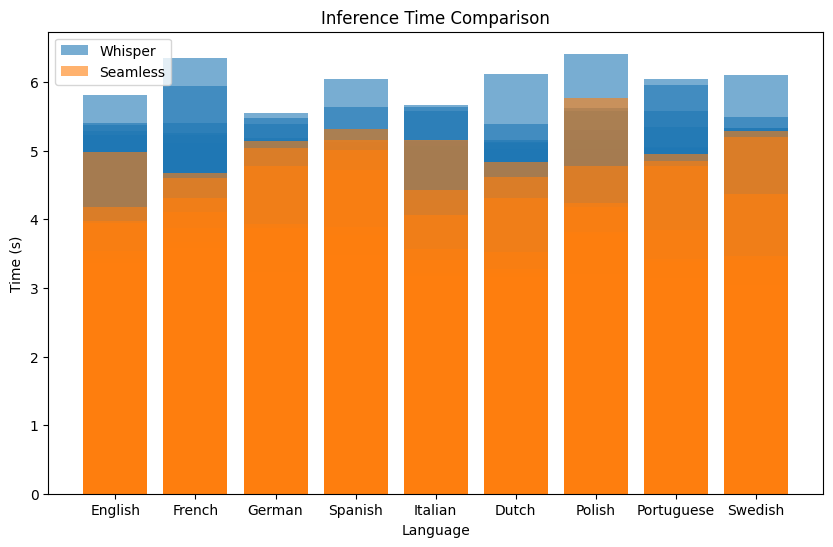

C:\Users\moham\AppData\Local\Temp\ipykernel_16280\3820835936.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


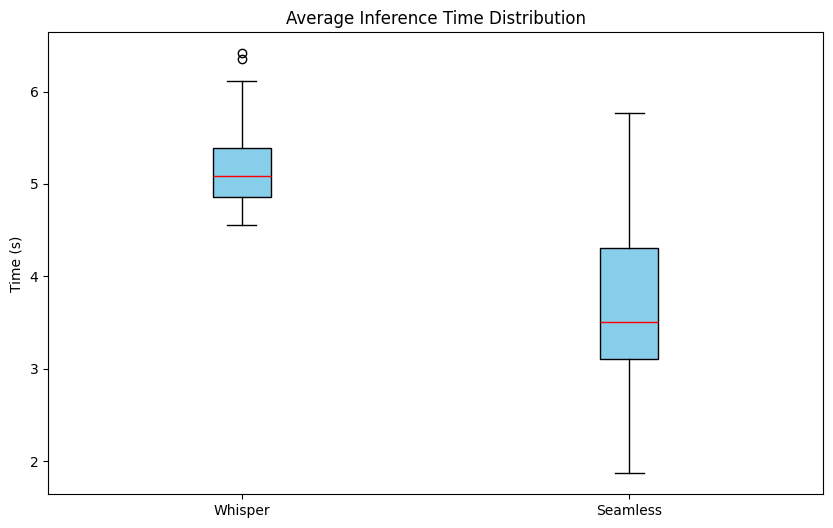

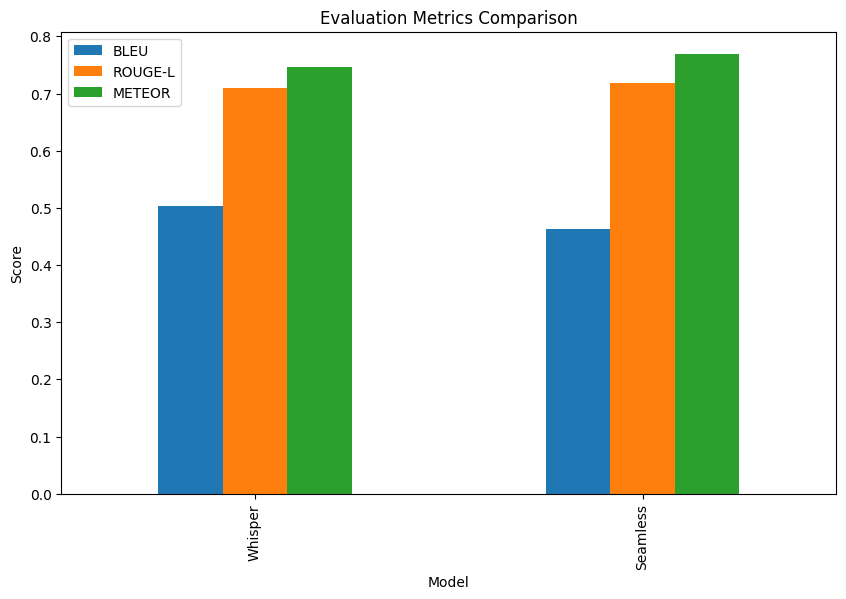

In [38]:
# Define directory to save plots
save_dir = "plots"


# Load evaluation metrics
bleu = evaluate.load("bleu", config_name="bleu")
rouge = evaluate.load("rouge")
meteor = evaluate.load("meteor")

# Filter references (ground truth)
references = ground_truth["Input"].tolist()

# Initialize results dictionary
results = {"Model": [], "BLEU": [], "ROUGE-L": [], "METEOR": []}

# Define models to evaluate
models = {
    "Whisper": whisper,
    "Seamless": seamless
}

# Evaluate metrics for each model
for model_name, df in models.items():
    # Prepare hypothesis and references
    hypothesis = df["Output"].tolist()
    
    # Calculate metrics
    bleu_score = bleu.compute(predictions=hypothesis, references=references)["bleu"]
    rouge_score = rouge.compute(predictions=hypothesis, references=references)["rougeL"]
    meteor_score = meteor.compute(predictions=hypothesis, references=references)["meteor"]
    
    # Append results
    results["Model"].append(model_name)
    results["BLEU"].append(bleu_score)
    results["ROUGE-L"].append(rouge_score)
    results["METEOR"].append(meteor_score)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot model times
plt.figure(figsize=(10, 6))
plt.bar(whisper["Language"], whisper["Model time"], alpha=0.6, label="Whisper")
plt.bar(seamless["Language"], seamless["Model time"], alpha=0.6, label="Seamless")
plt.xlabel("Language")
plt.ylabel("Time (s)")
plt.title("Inference Time Comparison")
plt.legend()
plt.savefig(os.path.join(save_dir, "inference_time_comparison.png"))
plt.show()

# Box plot for average times (two box plots for 1b and 9b models)
plt.figure(figsize=(10, 6))
plt.boxplot(
    [whisper["Model time"], seamless["Model time"]],
    labels=["Whisper", "Seamless"],
    patch_artist=True,
    boxprops=dict(facecolor="skyblue", color="black"),
    medianprops=dict(color="red")
)
plt.title("Average Inference Time Distribution")
plt.ylabel("Time (s)")
plt.savefig(os.path.join(save_dir, "inference_time_distribution.png"))
plt.show()


# Plot BLEU, ROUGE-L, METEOR scores
results_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Evaluation Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.savefig(os.path.join(save_dir, "evaluation_metrics_comparison.png"))
plt.show()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


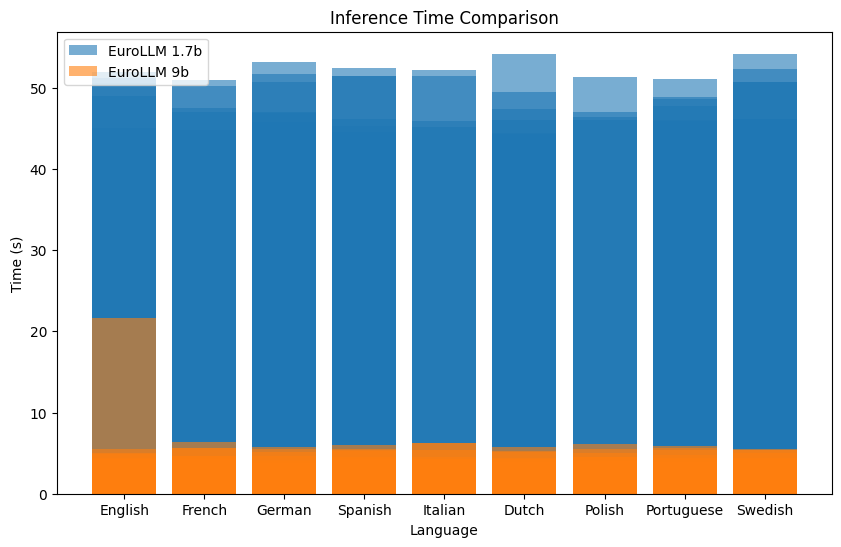

C:\Users\moham\AppData\Local\Temp\ipykernel_16280\2169422708.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


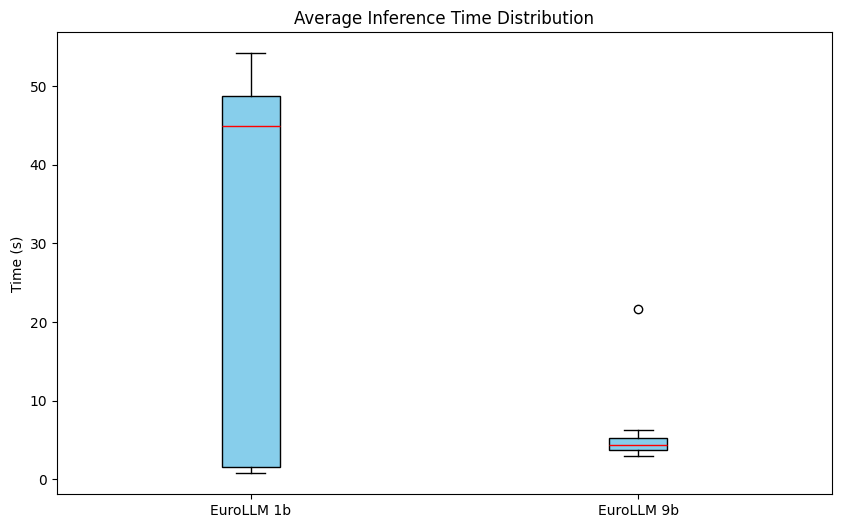

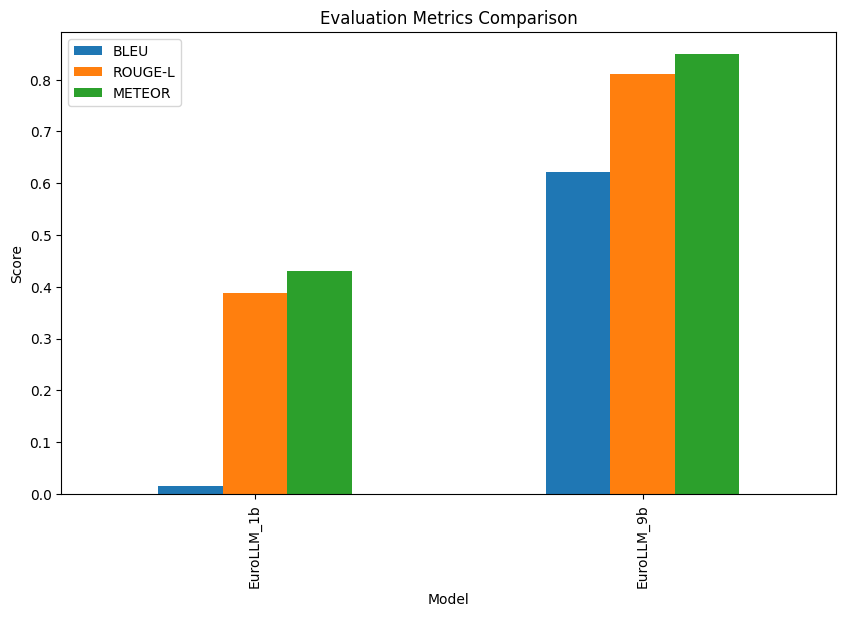

In [40]:
# Load evaluation metrics
bleu = evaluate.load("bleu", config_name="bleu")
rouge = evaluate.load("rouge")
meteor = evaluate.load("meteor")

# Filter references (ground truth)
references = ground_truth["Input"].tolist()

# Initialize results dictionary
results = {"Model": [], "BLEU": [], "ROUGE-L": [], "METEOR": []}

# Define models to evaluate
models = {
    "EuroLLM_1b": eurollm_1b,
    "EuroLLM_9b": eurollm_9b
}

# Evaluate metrics for each model
for model_name, df in models.items():
    # Prepare hypothesis and references
    hypothesis = df["Output"].tolist()
    
    # Calculate metrics
    bleu_score = bleu.compute(predictions=hypothesis, references=references)["bleu"]
    rouge_score = rouge.compute(predictions=hypothesis, references=references)["rougeL"]
    meteor_score = meteor.compute(predictions=hypothesis, references=references)["meteor"]
    
    # Append results
    results["Model"].append(model_name)
    results["BLEU"].append(bleu_score)
    results["ROUGE-L"].append(rouge_score)
    results["METEOR"].append(meteor_score)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot model times
plt.figure(figsize=(10, 6))
plt.bar(eurollm_1b["Language"], eurollm_1b["Time (s)"], alpha=0.6, label="EuroLLM 1.7b")
plt.bar(eurollm_9b["Language"], eurollm_9b["Time (s)"], alpha=0.6, label="EuroLLM 9b")
plt.xlabel("Language")
plt.ylabel("Time (s)")
plt.title("Inference Time Comparison")
plt.legend()
plt.savefig(os.path.join(save_dir, "EuroLLM_inference_time_comparison.png"))
plt.show()

# Box plot for average times (two box plots for 1b and 9b models)
plt.figure(figsize=(10, 6))
plt.boxplot(
    [eurollm_1b["Time (s)"], eurollm_9b["Time (s)"]],
    labels=["EuroLLM 1b", "EuroLLM 9b"],
    patch_artist=True,
    boxprops=dict(facecolor="skyblue", color="black"),
    medianprops=dict(color="red")
)
plt.title("Average Inference Time Distribution")
plt.ylabel("Time (s)")
plt.savefig(os.path.join(save_dir, "EuroLLM_inference_time_distribution.png"))
plt.show()


# Plot BLEU, ROUGE-L, METEOR scores
results_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Evaluation Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.savefig(os.path.join(save_dir, "EuroLLM_evaluation_metrics_comparison.png"))
plt.show()